# Guia da Camada de Transporte
### IMPORTANDO AS DEPENDÊNCIAS
##### O documento tem o objetivo de demostrar o funcionamento da camada de transporte, além de suas funções e ferramentas.


In [1]:
from quantumnet.components import Network, Host
from quantumnet.objects import Qubit, Logger

##### Instanciando a rede, e setando a topologia.

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


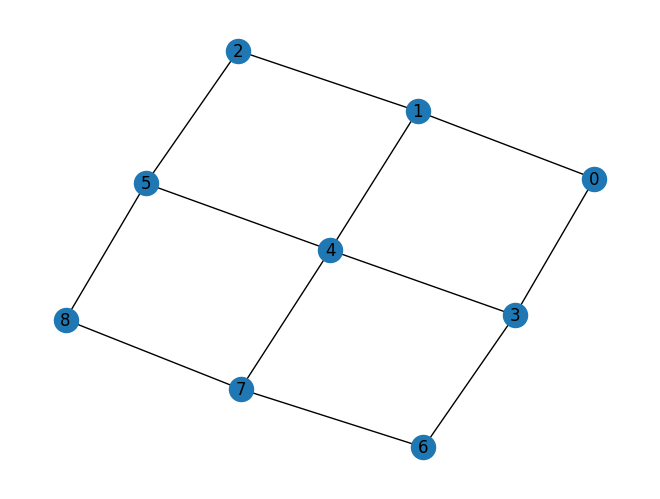

In [2]:
rede = Network()
rede.set_ready_topology("Grade", 3,3)
rede.draw()
Logger.activate(Logger)

##### Definindo os hosts alice e bob nos nós 1 e 2 respectivamente.

In [3]:
alice = rede.get_host(0)
bob = rede.get_host(8)

##### Verificação da memória de Alice e Bob.

In [4]:
print('memoria de alice:',(alice.memory))
print('memoria de bob:',(bob.memory))

memoria de alice: [<quantumnet.objects.qubit.Qubit object at 0x0000021858922060>, <quantumnet.objects.qubit.Qubit object at 0x00000218589220F0>, <quantumnet.objects.qubit.Qubit object at 0x0000021858922090>, <quantumnet.objects.qubit.Qubit object at 0x0000021858922150>, <quantumnet.objects.qubit.Qubit object at 0x0000021858922180>, <quantumnet.objects.qubit.Qubit object at 0x0000021858922210>, <quantumnet.objects.qubit.Qubit object at 0x00000218589221B0>, <quantumnet.objects.qubit.Qubit object at 0x00000218589222A0>, <quantumnet.objects.qubit.Qubit object at 0x00000218589222D0>, <quantumnet.objects.qubit.Qubit object at 0x0000021858922300>]
memoria de bob: [<quantumnet.objects.qubit.Qubit object at 0x0000021858923500>, <quantumnet.objects.qubit.Qubit object at 0x0000021858923590>, <quantumnet.objects.qubit.Qubit object at 0x00000218589235F0>, <quantumnet.objects.qubit.Qubit object at 0x0000021858923650>, <quantumnet.objects.qubit.Qubit object at 0x00000218589236B0>, <quantumnet.objects

##### A função a seguir é chamada para que seja realizada a requesição de uma rota para que haja a transmissão de n qubits necessários. Ela vai executar toda a camada de transporte.

In [5]:
rede.transportlayer.run_transport_layer(0,8,11)

2024-11-17 15:11:07,020: Número insuficiente de qubits na memória de Alice (Host 0). Criando mais 1 qubits para completar os 11 necessários.
2024-11-17 15:11:07,023: Timeslot antes da criação do qubit: 1
2024-11-17 15:11:07,025: Qubit 90 adicionado à memória do Host 0.
2024-11-17 15:11:07,027: Qubit 90 criado com fidelidade inicial 0.0783071524918425 e adicionado à memória do Host 0.
2024-11-17 15:11:07,029: Qubit criado para Alice (Host 0) no timeslot: 2
2024-11-17 15:11:07,031: Tentativa 1 de transmissão de qubits entre 0 e 8.
2024-11-17 15:11:07,033: Timeslot 3: Buscando rota válida entre 0 e 8.
2024-11-17 15:11:07,036: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-11-17 15:11:07,042: Teletransporte de qubit de 0 para 8 na rota [0, 3, 6, 7, 8] foi bem-sucedido com fidelidade final de 0.053182079607965914.
2024-11-17 15:11:07,044: Timeslot 4: Buscando rota válida entre 0 e 8.
2024-11-17 15:11:07,046: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-11-17 15:11:07,048: Teletransporte de qu

True

##### A função get_total_useds_qubits, será usada para mostrar quantos qubits foram usados na camada de Transporte.

In [6]:
rede.get_total_useds_qubits()

2024-11-17 15:11:07,216: Qubits usados na camada PhysicalLayer: 1
2024-11-17 15:11:07,218: Qubits usados na camada LinkLayer: 0
2024-11-17 15:11:07,221: Qubits usados na camada TransportLayer: 11
2024-11-17 15:11:07,224: Qubits usados na camada ApplicationLayer: 0


12

##### Essa função apresenta uma lista de métricas do transmissão dos qubits.

In [7]:
rede.transportlayer.get_teleported_qubits()

[{'alice_id': 0,
  'bob_id': 8,
  'route': [0, 3, 6, 7, 8],
  'fidelity_alice': 0.07295209822766242,
  'fidelity_route': 0.7290000000000001,
  'F_final': 0.053182079607965914,
  'timeslot': 3,
  'qubit': <quantumnet.objects.qubit.Qubit at 0x21858922060>},
 {'alice_id': 0,
  'bob_id': 8,
  'route': [0, 3, 6, 7, 8],
  'fidelity_alice': 0.016308765763099788,
  'fidelity_route': 0.6561000000000001,
  'F_final': 0.010700181217169773,
  'timeslot': 4,
  'qubit': <quantumnet.objects.qubit.Qubit at 0x218589220f0>},
 {'alice_id': 0,
  'bob_id': 8,
  'route': [0, 3, 6, 7, 8],
  'fidelity_alice': 0.31534130178199077,
  'fidelity_route': 0.5904900000000002,
  'F_final': 0.18620588528924778,
  'timeslot': 5,
  'qubit': <quantumnet.objects.qubit.Qubit at 0x21858922090>},
 {'alice_id': 0,
  'bob_id': 8,
  'route': [0, 3, 6, 7, 8],
  'fidelity_alice': 0.3173115639488878,
  'fidelity_route': 0.5314410000000002,
  'F_final': 0.16863237485656093,
  'timeslot': 6,
  'qubit': <quantumnet.objects.qubit.Qubi

##### No avg_fidelity_on_ltransportlayer, é realizada o cálculo da média da fidelidade dos ERPs criados na camada de Transporte.

In [8]:
rede.transportlayer.avg_fidelity_on_transportlayer()

2024-11-17 15:11:07,350: Fidelidade do qubit utilizado de 0 para 8: 0.053182079607965914
2024-11-17 15:11:07,353: Fidelidade do qubit utilizado de 0 para 8: 0.010700181217169773
2024-11-17 15:11:07,355: Fidelidade do qubit utilizado de 0 para 8: 0.18620588528924778
2024-11-17 15:11:07,356: Fidelidade do qubit utilizado de 0 para 8: 0.16863237485656093
2024-11-17 15:11:07,358: Fidelidade do qubit utilizado de 0 para 8: 0.07127799807733456
2024-11-17 15:11:07,360: Fidelidade do qubit utilizado de 0 para 8: 0.18176415279502806
2024-11-17 15:11:07,362: Fidelidade do qubit utilizado de 0 para 8: 0.034622423605522375
2024-11-17 15:11:07,363: Fidelidade do qubit utilizado de 0 para 8: 0.0017196403053448164
2024-11-17 15:11:07,365: Fidelidade do qubit utilizado de 0 para 8: 0.043238875136655544
2024-11-17 15:11:07,366: Fidelidade do qubit utilizado de 0 para 8: 0.012218388797154445
2024-11-17 15:11:07,368: Fidelidade do qubit utilizado de 0 para 8: 0.0062462830217525364
2024-11-17 15:11:07,370

0.0699825711554306

##### A função get_timeslot apresenta quantos timeslot se passaram durante a execução da camada.

In [9]:
rede.get_timeslot()

13

##### Por meio do display_all_qubits_timeslot, pode-se verificar em qual timeslot cada qubit foi criado.

In [10]:
rede.display_all_qubit_timeslots()

Qubit 0 foi criado no timeslot 0 na camada Physical Layer
Qubit 1 foi criado no timeslot 0 na camada Physical Layer
Qubit 2 foi criado no timeslot 0 na camada Physical Layer
Qubit 3 foi criado no timeslot 0 na camada Physical Layer
Qubit 4 foi criado no timeslot 0 na camada Physical Layer
Qubit 5 foi criado no timeslot 0 na camada Physical Layer
Qubit 6 foi criado no timeslot 0 na camada Physical Layer
Qubit 7 foi criado no timeslot 0 na camada Physical Layer
Qubit 8 foi criado no timeslot 0 na camada Physical Layer
Qubit 9 foi criado no timeslot 0 na camada Physical Layer
Qubit 10 foi criado no timeslot 0 na camada Physical Layer
Qubit 11 foi criado no timeslot 0 na camada Physical Layer
Qubit 12 foi criado no timeslot 0 na camada Physical Layer
Qubit 13 foi criado no timeslot 0 na camada Physical Layer
Qubit 14 foi criado no timeslot 0 na camada Physical Layer
Qubit 15 foi criado no timeslot 0 na camada Physical Layer
Qubit 16 foi criado no timeslot 0 na camada Physical Layer
Qubit 1